In [66]:
import os
import numpy as np
import scipy
from scipy import integrate
import matplotlib.pyplot as plt
import camb
from camb import model
from jupyterthemes import jtplot
import math
import time
import h5py
import sys 
moments_path = os.path.realpath(os.path.join('/global/cfs/cdirs/des/shivamp/cosmosis2p0/cosmosis-standard-library/gen_moments/Moments_analysis/'))
sys.path.insert(0, moments_path)
import h5py as h5
import healpy as hp
import pickle
import copy
def save_obj(name, obj):
    with open(name + '.pkl', 'wb') as f:
        pickle.dump(obj, f, protocol = 2)

def load_obj(name):
    with open(name + '.pkl', 'rb') as f:
        return pickle.load(f)#, encoding='latin1')

jtplot.reset()
from tqdm import tqdm




In [67]:
# kp3_all_data


In [112]:
def filter_full_data(data_full, params):
    filter_type = params['type']
    
    sm_all = data_full['sm_all']
    id_kp2_all_finite = data_full['id_kp2_all_finite'][0,:,:].T
    ind_filter_kp2 = []
    for jid in range(len(id_kp2_all_finite)):
        jz1, jz2, i, j = id_kp2_all_finite[jid]
        
        if filter_type == 'auto_zbin':
            if jz1 == jz2:
                ind_filter_kp2.append(jid)
                
        if filter_type == 'simple_test':
            if (jz1 == jz2) and (jz2==3) and (i==j):
                ind_filter_kp2.append(jid)
                

        if filter_type == 'auto_smbin':
            if i == j:
                ind_filter_kp2.append(jid)

        if filter_type == 'auto_zbin_gtsc':
            sc_all = params['sc_all']
            if jz1 == jz2:
                sc_jz_all = np.array([sc_all[jz1], sc_all[jz2]])
                sc_jz_max = np.amax(sc_jz_all)
                # if (sm_all[i] > sc_all[jz1]) & (sm_all[j] > sc_all[jz2]):
                if (sm_all[i] > sc_jz_max) & (sm_all[j] > sc_jz_max):                
                    ind_filter_kp2.append(jid)

        if filter_type == 'auto_smbin_gtsc':
            sc_all = params['sc_all']            
            if i == j:
                sc_jz_all = np.array([sc_all[jz1], sc_all[jz2]])
                sc_jz_max = np.amax(sc_jz_all)
                # if (sm_all[i] > sc_all[jz1]) & (sm_all[j] > sc_all[jz2]):
                if (sm_all[i] > sc_jz_max) & (sm_all[j] > sc_jz_max):                
                    ind_filter_kp2.append(jid)

        if filter_type == 'all_gtsc':
            sc_all = params['sc_all']    
            sc_jz_all = np.array([sc_all[jz1], sc_all[jz2]])
            sc_jz_max = np.amax(sc_jz_all)
            # if (sm_all[i] > sc_all[jz1]) & (sm_all[j] > sc_all[jz2]):
            if (sm_all[i] > sc_jz_max) & (sm_all[j] > sc_jz_max):
                ind_filter_kp2.append(jid)
                
        if filter_type == 'all':
            ind_filter_kp2.append(jid)
        
    ind_filter_kp2 = np.array(ind_filter_kp2)
    data_kp2_lhs_filter = data_full['kp2_all_lhs'][:, ind_filter_kp2]

    id_kp3_all_finite = data_full['id_kp3_all_finite'][0,:,:].T
    ind_filter_kp3 = []
    for jid in range(len(id_kp3_all_finite)):
        jz1, jz2, jz3, i, j, k = id_kp3_all_finite[jid]
        if filter_type == 'auto_zbin':
            if (jz1 == jz2) and (jz2 == jz3):
                ind_filter_kp3.append(jid)
                
        if filter_type == 'simple_test':
            if (jz1 == jz2) and (jz2==jz3) and (jz2==3) and (i==j) and (j==k):
                ind_filter_kp3.append(jid)
                

        if filter_type == 'auto_smbin':
            if (i == j) and (j == k):
                ind_filter_kp3.append(jid)

        if filter_type == 'auto_zbin_gtsc':
            sc_all = params['sc_all']
            if (jz1 == jz2) and (jz2 == jz3):
                sc_jz_all = np.array([sc_all[jz1], sc_all[jz2], sc_all[jz3]])
                sc_jz_max = np.amax(sc_jz_all)
                # if (sm_all[i] > sc_all[jz1]) & (sm_all[j] > sc_all[jz2]) & (sm_all[k] > sc_all[jz3]):
                if (sm_all[i] > sc_jz_max) & (sm_all[j] > sc_jz_max) & (sm_all[k] > sc_jz_max):                    
                    ind_filter_kp3.append(jid)

        if filter_type == 'auto_smbin_gtsc':
            sc_all = params['sc_all']            
            if (i == j) and (j == k):
                sc_jz_all = np.array([sc_all[jz1], sc_all[jz2], sc_all[jz3]])
                sc_jz_max = np.amax(sc_jz_all)
                # if (sm_all[i] > sc_all[jz1]) & (sm_all[j] > sc_all[jz2]) & (sm_all[k] > sc_all[jz3]):
                if (sm_all[i] > sc_jz_max) & (sm_all[j] > sc_jz_max) & (sm_all[k] > sc_jz_max):                    
                    ind_filter_kp3.append(jid)

        if filter_type == 'all_gtsc':
            sc_all = params['sc_all']         
            sc_jz_all = np.array([sc_all[jz1], sc_all[jz2], sc_all[jz3]])
            sc_jz_max = np.amax(sc_jz_all)
            # if (sm_all[i] > sc_all[jz1]) & (sm_all[j] > sc_all[jz2]) & (sm_all[k] > sc_all[jz3]):
            if (sm_all[i] > sc_jz_max) & (sm_all[j] > sc_jz_max) & (sm_all[k] > sc_jz_max):                    
                ind_filter_kp3.append(jid)
                
        if filter_type == 'all':
            ind_filter_kp3.append(jid)
        
    ind_filter_kp3 = np.array(ind_filter_kp3)
    data_kp3_lhs_filter = data_full['kp3_all_lhs'][:, ind_filter_kp3]

    return data_kp2_lhs_filter, data_kp3_lhs_filter, ind_filter_kp2, ind_filter_kp3
    



In [113]:
jr_lhs = 0
nsamp_lhs = 50000
sdir = '/global/cfs/cdirs/des/shivamp/cosmosis2p0/cosmosis-standard-library/saveDVs/'
# data_full = pk.load(open(sdir + 'newIA/' + 'COMBINED_lhs_n' + str(nsamp_lhs) + '_jr' + str(jr_lhs) + '.pk','rb'))
fname = sdir + 'newIA/' + 'COMBINED_lhs_n' + str(nsamp_lhs) + '_jr' + str(jr_lhs) + '.pk'
# np.save(fname, saved, allow_pickle=True)
import h5py
hf = h5py.File(fname, 'r')




In [114]:
data_full = {'kp2_all_lhs':hf['kp2_all_lhs'], 'kp3_all_lhs':hf['kp3_all_lhs'], 
         'id_kp2_all_finite':hf['id_kp2_all_finite'],
        'id_kp3_all_finite':hf['id_kp3_all_finite'],
         'sm_all':hf['sm_all']
        }




In [115]:
sc_all = [45.0, 28.0, 18.0, 18.0]

# params_filter = {'type':'auto_smbin_gtsc', 'sc_all':sc_all}
# params_filter = {'type':'all_gtsc', 'sc_all':sc_all}
params_filter = {'type':'all', 'sc_all':sc_all}
norm_with_mean = True 
var_th = 0.9999
do_whiten = False
# params_filter = {'type':'simple_test'}
kp2_all_lhs, kp3_all_lhs, ind_filter_kp2, ind_filter_kp3 = filter_full_data(data_full, params_filter)
ind_filter_kp2_kp3 = np.concatenate((ind_filter_kp2, hf['kp2_all_lhs'].shape[1] + ind_filter_kp3))
kp2_kp3_all_lhs = np.hstack((kp2_all_lhs, kp3_all_lhs))






In [116]:
kp2_all_lhs.shape, kp3_all_lhs.shape




((47962, 360), (47962, 2400))

In [117]:
# ind_filter_kp2
# (data_full['id_kp2_all_finite'][0,:,:].T)[ind_filter_kp2,:]




In [118]:
nsim2, ncomp2 = kp2_all_lhs.shape[0], kp2_all_lhs.shape[1] 
nsim3, ncomp3 = kp3_all_lhs.shape[0], kp3_all_lhs.shape[1] 
nsim23, ncomp23 = kp2_kp3_all_lhs.shape[0], kp2_kp3_all_lhs.shape[1] 




In [119]:
df = pk.load(open('/global/cfs/cdirs/des/shivamp/cosmosis2p0/cosmosis-standard-library/gen_moments/fid_sim_measurements.pk','rb'))  

# saved = {'kp2_all_fid':kp2_all_fid, 'kp3_all_fid':kp3_all_fid, 'kp3_all_data':kp3_all_data, 'kp2_all_data':kp2_all_data}
kp2_all_fid = df['kp2_all_fid']
kp3_all_fid = df['kp3_all_fid']
kp3_all_data = df['kp3_all_data']
kp2_all_data = df['kp2_all_data']
kp2_kp3_all_data = np.hstack((kp2_all_data, kp3_all_data))
kp2_kp3_all_fid = np.concatenate((kp2_all_fid, kp3_all_fid))



In [120]:
# kp2_kp3_all_fid.shape



In [121]:
# do_div_fid = False
# if do_div_fid:
#     kp2_all_fid_mat = np.tile(kp2_all_fid[ind_filter_kp2].reshape(1, ncomp2), (nsim2, 1))
#     kp3_all_fid_mat = np.tile(kp3_all_fid[ind_filter_kp3].reshape(1, ncomp3), (nsim3, 1))
# else:
#     kp2_all_fid_mat = np.tile(np.ones_like(ind_filter_kp2).reshape(1, ncomp2), (nsim2, 1))
#     kp3_all_fid_mat = np.tile(np.ones_like(ind_filter_kp3).reshape(1, ncomp3), (nsim3, 1))
    


In [122]:
from sklearn.preprocessing import StandardScaler
scaler_kp2 = StandardScaler(with_mean=norm_with_mean)
scaler_kp2.fit(kp2_all_lhs)
kp2_all_lhs_normalised = scaler_kp2.transform(kp2_all_lhs)
# scaler_kp2.fit(kp2_all_lhs/kp2_all_fid_mat)
# kp2_all_lhs_normalised = scaler_kp2.transform(kp2_all_lhs/kp2_all_fid_mat)
# kp2_all_lhs_normalised = (kp2_all_lhs/kp2_all_fid_mat)/scaler_kp2.scale_


scaler_kp3 = StandardScaler(with_mean=norm_with_mean)
scaler_kp3.fit(kp3_all_lhs)
kp3_all_lhs_normalised = scaler_kp3.transform(kp3_all_lhs)
# scaler_kp3.fit(kp3_all_lhs/kp3_all_fid_mat)
# kp3_all_lhs_normalised = (kp3_all_lhs/kp3_all_fid_mat)/scaler_kp3.scale_

scaler_kp2_kp3 = StandardScaler(with_mean=norm_with_mean)
scaler_kp2_kp3.fit(kp2_kp3_all_lhs)
kp2_kp3_all_lhs_normalised = scaler_kp2_kp3.transform(kp2_kp3_all_lhs)




In [123]:
# np.mean(kp2_all_lhs_normalised,axis=0)
# scaler_kp3.mean_


In [124]:
# # scaler_kp2_kp3 = StandardScaler().fit(kp2_kp3_all_lhs)
# # kp2_kp3_all_lhs_normalised = scaler_kp2_kp3.transform(kp2_kp3_all_lhs)
# pl.figure()
# for ji in range(kp2_all_lhs_normalised.shape[0]):
#     pl.plot(kp2_all_lhs_normalised[ji,:], color='k', alpha=0.2)



In [125]:

from sklearn.decomposition import PCA
pca_kp2 = PCA(n_components=var_th,whiten=do_whiten)
pca_kp2.fit(kp2_all_lhs_normalised)
kp2_all_lhs_normalised_pcaonly = pca_kp2.transform(kp2_all_lhs_normalised)
# cov_mat_kp2_pca = np.cov(kp2_all_lhs_normalised_pcaonly.T)
print(pca_kp2.explained_variance_ratio_, (pca_kp2.components_).shape)



[7.12574710e-01 1.52170448e-01 8.61474626e-02 1.63953326e-02
 1.35118246e-02 6.12393547e-03 4.55064048e-03 2.89840554e-03
 1.42197737e-03 1.23039931e-03 6.94460974e-04 4.97665601e-04
 4.10312033e-04 3.67327645e-04 2.65315343e-04 1.64350636e-04
 1.40291250e-04 1.09430297e-04 9.11488619e-05 4.87950625e-05
 4.21587807e-05 3.15671092e-05 2.85369199e-05] (23, 360)


In [126]:
# print(pca_kp2.explained_variance_ratio_, (pca_kp2.components_).shape)



In [127]:
from sklearn.decomposition import PCA
pca_kp3 = PCA(n_components=var_th,whiten=do_whiten)
pca_kp3.fit(kp3_all_lhs_normalised)
kp3_all_lhs_normalised_pcaonly = pca_kp3.transform(kp3_all_lhs_normalised)
# cov_mat_kp3_pca = np.cov(kp3_all_lhs_normalised_pcaonly.T)
print(pca_kp3.explained_variance_ratio_, (pca_kp3.components_).shape)



[5.00976929e-01 2.32008119e-01 1.11133629e-01 9.38789586e-02
 3.61022417e-02 7.30515757e-03 5.63034483e-03 3.91599155e-03
 3.06000667e-03 2.09143738e-03 1.52002126e-03 9.59377721e-04
 4.31184077e-04 3.71112673e-04 1.39778416e-04 1.17198808e-04
 9.99691569e-05 7.15244980e-05 5.85650789e-05 3.92478398e-05] (20, 2400)


In [128]:
from sklearn.decomposition import PCA
pca_kp2_kp3 = PCA(n_components=var_th,whiten=do_whiten)
pca_kp2_kp3.fit(kp2_kp3_all_lhs_normalised)
kp2_kp3_all_lhs_normalised_pcaonly = pca_kp2_kp3.transform(kp2_kp3_all_lhs_normalised)
# cov_mat_kp3_pca = np.cov(kp3_all_lhs_normalised_pcaonly.T)
print(pca_kp2_kp3.explained_variance_ratio_, (pca_kp2_kp3.components_).shape)




[4.35641990e-01 2.01747581e-01 9.66531148e-02 9.29243434e-02
 8.16337935e-02 3.13910998e-02 1.98471606e-02 1.12365633e-02
 6.35220585e-03 4.89577112e-03 3.40537022e-03 2.66102760e-03
 2.13852519e-03 1.81822644e-03 1.76210223e-03 1.32162582e-03
 8.34073678e-04 7.98739985e-04 5.93475507e-04 3.78210499e-04
 3.74609531e-04 3.22484119e-04 1.85465925e-04 1.60493170e-04
 1.21466693e-04 1.01696285e-04 9.05890921e-05 8.69095146e-05
 6.49100884e-05 6.21857171e-05 5.35180013e-05 5.08864796e-05
 4.79140062e-05 3.46063543e-05 3.40899159e-05 2.38760119e-05
 2.14353346e-05 1.82946933e-05 1.42759138e-05] (39, 2760)


In [83]:
# from sklearn.decomposition import PCA
# pca_kp2_kp3 = PCA(n_components=var_th,whiten=do_whiten)
# pca_kp2_kp3.fit(kp2_kp3_all_lhs_normalised)
# kp2_kp3_all_lhs_normalised_pcaonly = pca_kp2_kp3.transform(kp2_kp3_all_lhs_normalised)
# # cov_mat_kp2_kp3_pca = np.cov(kp2_kp3_all_lhs_normalised_pcaonly.T)






In [84]:
# nsim2_data, nsim3_data = kp2_all_data.shape[0], kp3_all_data.shape[0]
# if do_div_fid:
#     kp2_all_fid_mat2 = np.tile(kp2_all_fid[ind_filter_kp2].reshape(1, ncomp2), (nsim2_data, 1))
#     kp3_all_fid_mat2 = np.tile(kp3_all_fid[ind_filter_kp3].reshape(1, ncomp3), (nsim3_data, 1))
# else:
#     kp2_all_fid_mat2 = np.tile(np.ones_like(ind_filter_kp2).reshape(1, ncomp2), (nsim2_data, 1))
#     kp3_all_fid_mat2 = np.tile(np.ones_like(ind_filter_kp3).reshape(1, ncomp3), (nsim3_data, 1))
    




In [129]:
kp2_all_data_normalised = scaler_kp2.transform(kp2_all_data[:,ind_filter_kp2])
kp3_all_data_normalised = scaler_kp3.transform(kp3_all_data[:,ind_filter_kp3])
kp2_kp3_all_data_normalised = scaler_kp2_kp3.transform(kp2_kp3_all_data[:,ind_filter_kp2_kp3])


# kp2_all_data_normalised = scaler_kp2.transform(kp2_all_data[:,ind_filter_kp2]/kp2_all_fid_mat2)
# kp3_all_data_normalised = scaler_kp3.transform(kp3_all_data[:,ind_filter_kp3]/kp3_all_fid_mat2)

# kp2_all_data_normalised = (kp2_all_data[:,ind_filter_kp2]/kp2_all_fid_mat2)/scaler_kp2.scale_
# kp3_all_data_normalised = (kp3_all_data[:,ind_filter_kp3]/kp3_all_fid_mat2)/scaler_kp3.scale_



In [130]:
# scaler_kp2.mean_, scaler_kp2.scale_
# kp2_all_data[:,ind_filter_kp2]/kp2_all_fid_mat2


In [131]:
kp2_fid_normalised = scaler_kp2.transform(np.array([kp2_all_fid[ind_filter_kp2]]))
kp3_fid_normalised = scaler_kp3.transform(np.array([kp3_all_fid[ind_filter_kp3]]))
kp2_kp3_fid_normalised = scaler_kp2_kp3.transform(np.array([kp2_kp3_all_fid[ind_filter_kp2_kp3]]))

# kp2_fid_normalised = scaler_kp2.transform(np.array([kp2_all_fid[ind_filter_kp2]/kp2_all_fid[ind_filter_kp2]]))
# kp3_fid_normalised = scaler_kp3.transform(np.array([kp3_all_fid[ind_filter_kp3]/kp3_all_fid[ind_filter_kp3]]))

# kp2_fid_normalised = (np.array([kp2_all_fid[ind_filter_kp2]]))/scaler_kp2.scale_
# kp3_fid_normalised = (np.array([kp3_all_fid[ind_filter_kp3]]))/scaler_kp3.scale_




In [132]:
kp2_all_data_normalised_pcaonly = pca_kp2.transform(kp2_all_data_normalised)
kp3_all_data_normalised_pcaonly = pca_kp3.transform(kp3_all_data_normalised)
kp2_kp3_all_data_normalised_pcaonly = pca_kp2_kp3.transform(kp2_kp3_all_data_normalised)


In [133]:
# kp2_fid_normalised_pcaonly = pca_kp2.transform(kp2_fid_normalised)
# kp3_fid_normalised_pcaonly = pca_kp3.transform(kp3_fid_normalised)



In [134]:
kp2_fid_normalised_pcaonly = pca_kp2.transform(kp2_fid_normalised)
kp3_fid_normalised_pcaonly = pca_kp3.transform(kp3_fid_normalised)
kp2_kp3_fid_normalised_pcaonly = pca_kp2_kp3.transform(kp2_kp3_fid_normalised)



In [135]:
mean_kp2sims_pca = np.mean(kp2_all_data_normalised_pcaonly.T, axis=1)
mean_kp3sims_pca = np.mean(kp3_all_data_normalised_pcaonly.T, axis=1)
mean_kp2kp3sims_pca = np.mean(kp2_kp3_all_data_normalised_pcaonly.T, axis=1)



cov_mat_kp2sims_pca = np.cov(kp2_all_data_normalised_pcaonly.T)
cov_mat_kp3sims_pca = np.cov(kp3_all_data_normalised_pcaonly.T)
cov_mat_kp2kp3sims_pca = np.cov(kp2_kp3_all_data_normalised_pcaonly.T)





In [136]:
import dill
saved = {'mean_kp2sims_pca':mean_kp2sims_pca, 'mean_kp3sims_pca':mean_kp3sims_pca, 'mean_kp2kp3sims_pca':mean_kp2kp3sims_pca,
        'cov_mat_kp2sims_pca':cov_mat_kp2sims_pca, 'cov_mat_kp3sims_pca':cov_mat_kp3sims_pca, 'cov_mat_kp2kp3sims_pca':cov_mat_kp2kp3sims_pca,
        'kp2_fid_normalised_pcaonly':kp2_fid_normalised_pcaonly, 'kp3_fid_normalised_pcaonly':kp3_fid_normalised_pcaonly, 
        'kp2_kp3_fid_normalised_pcaonly':kp2_kp3_fid_normalised_pcaonly, 'scaler_kp2':scaler_kp2,
        'scaler_kp3':scaler_kp3, 'scaler_kp2_kp3':scaler_kp2_kp3, 'pca_kp2':pca_kp2, 'pca_kp3':pca_kp3,
        'pca_kp2_kp3':pca_kp2_kp3, 'ind_filter_kp2':ind_filter_kp2, 'ind_filter_kp3':ind_filter_kp3,
        'ind_filter_kp2_kp3':ind_filter_kp2_kp3}
dill.dump(saved, open('measurements_all.pk','wb'))
# dill.dump(saved, open('measurements_all_gtsc.pk','wb'))
# dill.dump(saved, open('measurements_auto_smbin_gtsc.pk','wb'))




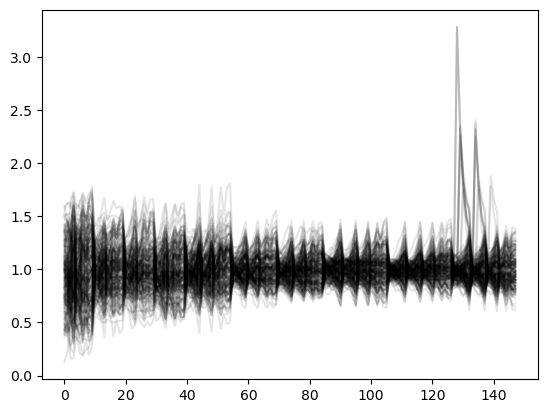

In [98]:
pl.figure()
for ji in range(kp2_all_data.shape[0]):
    pl.plot(kp2_all_data[ji,ind_filter_kp2]/kp2_all_fid[ind_filter_kp2], color='k', alpha=0.1)
pl.show()



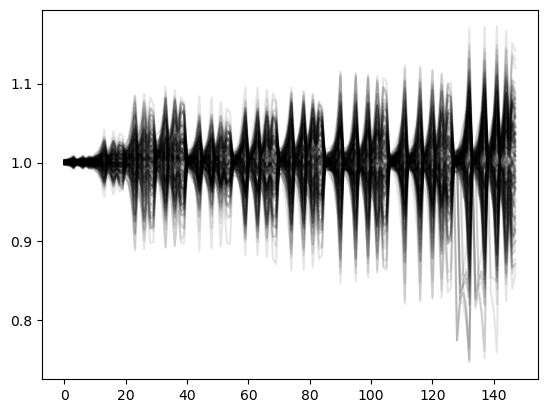

In [99]:
pl.figure()
for ji in range(kp2_all_data_normalised.shape[0]):
    pl.plot((kp2_all_data_normalised[ji,:]/kp2_fid_normalised)[0,:], color='k', alpha=0.1)
    # print(kp2_all_data_normalised[ji,:]/kp2_fid_normalised)
pl.show()



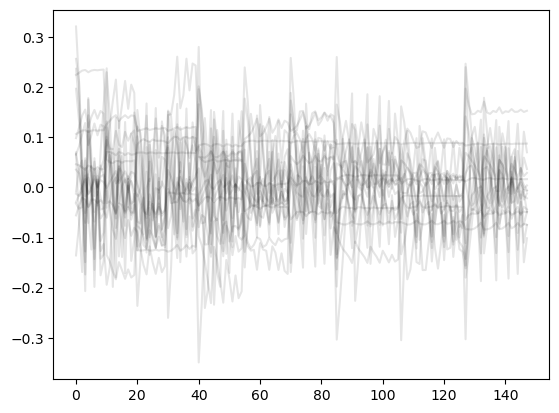

In [100]:
# pca_kp2.components_
pl.figure()
for ji in range(pca_kp2.components_.shape[0]):
    # pl.plot((pca_kp2.components_[ji,:]), color='k', alpha=0.1)
    pl.plot((pca_kp2.components_[ji,:]), color='k', alpha=0.1)    
    # print(kp2_all_data_normalised[ji,:]/kp2_fid_normalised)
pl.show()





/global/u1/s/spandey/self_module_ini/myenv3/lib/python3.7/site-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


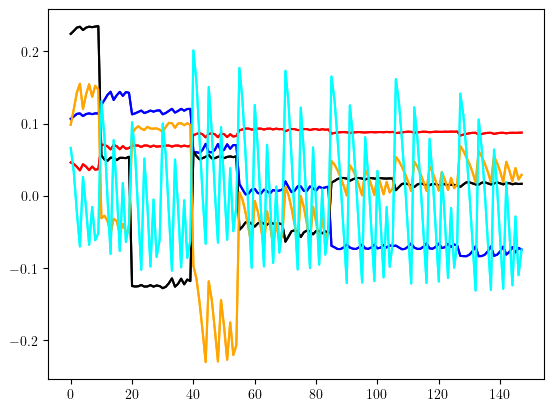

In [58]:
# pca_kp2.components_
import seaborn as sns   

num_lines = 6

ax = pl.subplot(111)
# ax.set_prop_cycle(color=sns.color_palette("coolwarm_r",num_lines))
# pl.figure()
# for ji in range(pca_kp3.components_.shape[0]):
colors = ['r','b','k','orange', 'cyan']
for ji in range(num_lines):    
    ax.plot((pca_kp2.components_[ji,:]),  alpha=1.0, color=colors[ji])
    # pl.plot((pca_kp3.components_[ji,:]), color=colors[ji], alpha=1.0)    
    # print(kp2_all_data_normalised[ji,:]/kp2_fid_normalised)
pl.show()





In [105]:
pca_kp3.components_.shape

(17, 634)

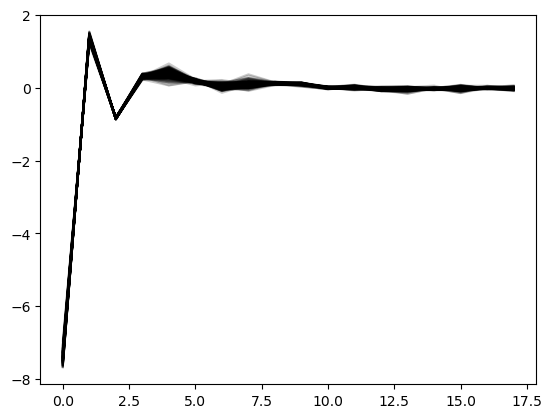

In [101]:
# scaler_kp2_kp3 = StandardScaler().fit(kp2_kp3_all_lhs)
# kp2_kp3_all_lhs_normalised = scaler_kp2_kp3.transform(kp2_kp3_all_lhs)
pl.figure()
for ji in range(kp2_all_data_normalised_pcaonly.shape[0]):
    pl.plot(kp2_all_data_normalised_pcaonly[ji,:], color='k', alpha=0.2)
pl.show()




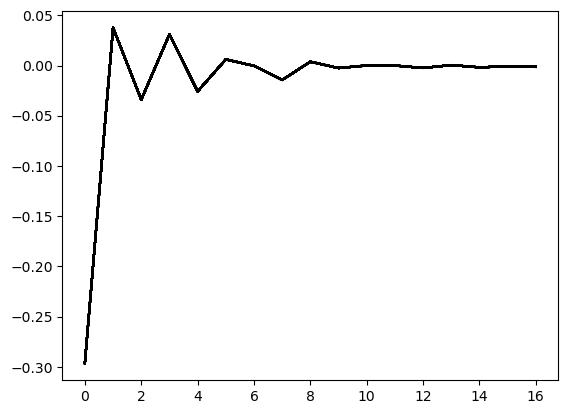

In [102]:
# scaler_kp2_kp3 = StandardScaler().fit(kp2_kp3_all_lhs)
# kp2_kp3_all_lhs_normalised = scaler_kp2_kp3.transform(kp2_kp3_all_lhs)
pl.figure()
for ji in range(kp3_all_data_normalised_pcaonly.shape[0]):
    pl.plot(kp3_all_data_normalised_pcaonly[ji,:], color='k', alpha=0.2)
pl.show()




In [73]:
# mean_kp2sims_pca
# kp2_all_data_normalised_pcaonly.shape
# mean_kp2sims_pca, kp2_fid_normalised_pcaonly
# mean_kp3sims_pca, kp3_fid_normalised_pcaonly
mean_kp2sims_pca, np.sqrt(np.diag(cov_mat_kp2sims_pca))



(array([-4.40959841,  1.35448876, -0.77313709,  0.32175476,  0.16426545,
         0.01115216,  0.03025774, -0.10675878,  0.01725452,  0.11614741,
         0.0100163 ,  0.01988856,  0.05333137, -0.01869072]),
 array([0.03874591, 0.02813421, 0.00668843, 0.03965256, 0.0169114 ,
        0.01322911, 0.02307066, 0.01564293, 0.01918129, 0.02646783,
        0.00630197, 0.01805718, 0.00725002, 0.0133136 ]))

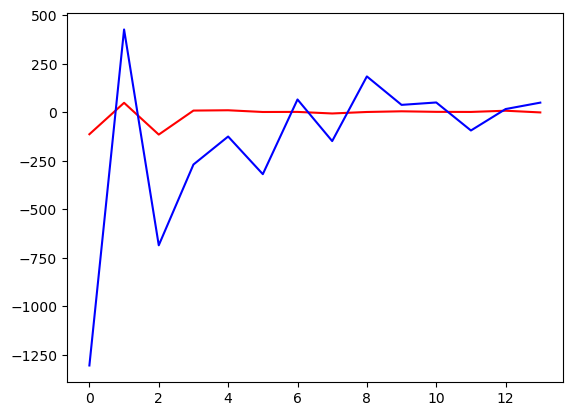

In [74]:
# pl.figure()
# pl.imshow(np.log(np.abs(cov_mat_kp2sims_pca)))
# pl.colorbar()
# pl.show()
pl.figure()
pl.plot(mean_kp2sims_pca/(np.sqrt(np.diag(cov_mat_kp2sims_pca))), color='r')
pl.plot(mean_kp3sims_pca/(np.sqrt(np.diag(cov_mat_kp3sims_pca))), color='b')
# pl.colorbar()
pl.show()




In [87]:
# pl.figure()
# pl.imshow(np.log(np.abs(cov_mat_kp2sims_pca)))
# pl.colorbar()
# pl.show()
# pl.figure()
# pl.plot(, color='r')
# pl.plot(mean_kp3sims_pca/(np.sqrt(np.diag(cov_mat_kp3sims_pca))), color='b')
# pl.colorbar()
# pl.show()




In [48]:
cov_mat_kp2sims_pca = np.cov(kp2_all_data_normalised.T)
np.sqrt(np.matmul(kp2_fid_normalised,np.matmul(np.linalg.inv(cov_mat_kp2sims_pca), kp2_fid_normalised.T)))




array([[33.69910983]])

In [41]:
np.sqrt(np.matmul(mean_kp2sims_pca,np.matmul(np.linalg.inv(cov_mat_kp2sims_pca), mean_kp2sims_pca.T)))




773.0701688670899

In [42]:
# cov_mat_kp2sims_pca.shape
# mean_kp2sims_pca.shape
# np.linalg.inv(cov_mat_kp2sims_pca)
# np.matmul(np.linalg.inv(cov_mat_kp2sims_pca), mean_kp2sims_pca.T)



In [43]:
np.sqrt(np.matmul(mean_kp3sims_pca,np.matmul(np.linalg.inv(cov_mat_kp3sims_pca), mean_kp3sims_pca.T)))



4189.689813277208

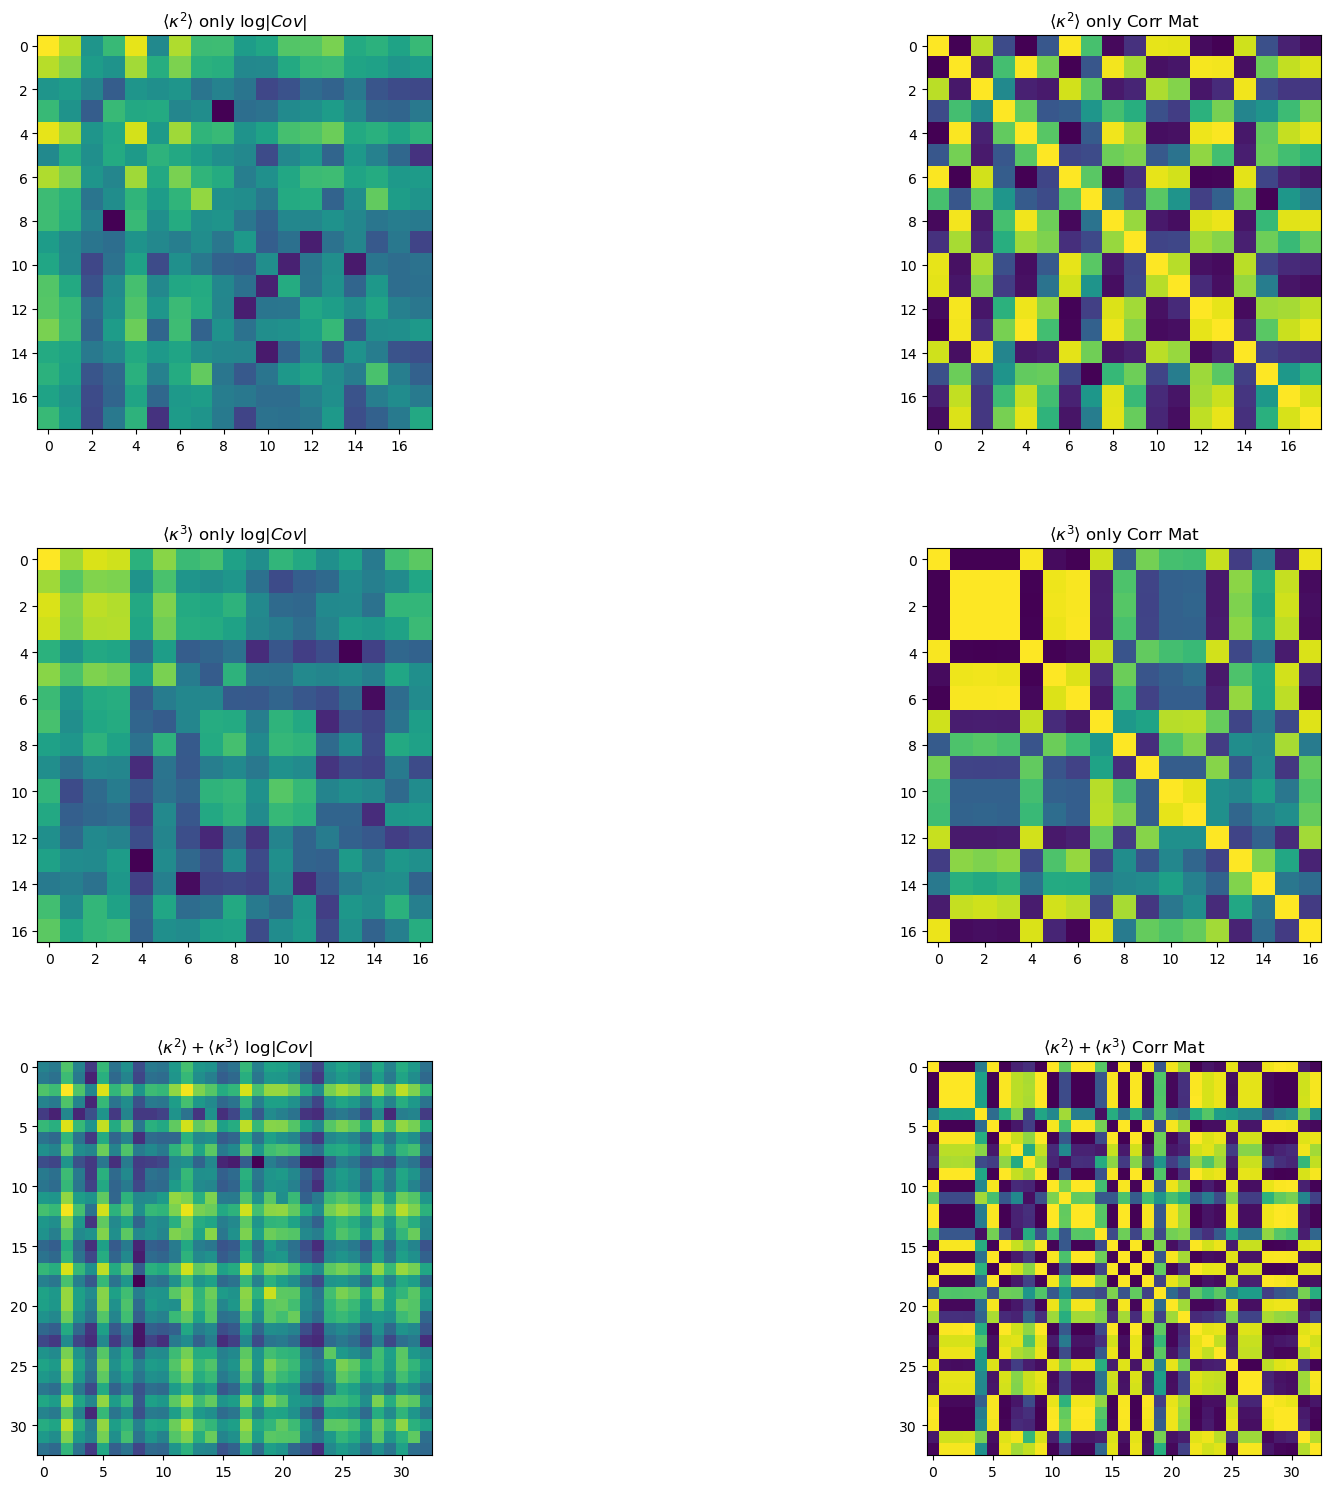

In [103]:
fig, ax_all2 = pl.subplots(3,2,figsize=(18,15))
for jv in range(3):
    ax_all = ax_all2[jv]
    for jp in range(2):
        ax = ax_all[jp]
        if jp == 0:
            if jv == 1:
                ax.imshow(np.log(np.abs(cov_mat_kp3sims_pca)))
                ax.set_title(r'$\langle \kappa^3 \rangle$ only $\log{|Cov|}$')
            if jv == 0:
                ax.imshow(np.log(np.abs(cov_mat_kp2sims_pca)))
                ax.set_title(r'$\langle \kappa^2 \rangle$ only $\log{|Cov|}$')
            if jv == 2:
                ax.imshow(np.log(np.abs(cov_mat_kp2kp3sims_pca)))
                ax.set_title(r'$\langle \kappa^2 \rangle + \langle \kappa^3 \rangle$ $\log{|Cov|}$')
                
                
        if jp == 1:
            if jv == 1:
                ax.imshow((np.corrcoef((cov_mat_kp3sims_pca))))
                ax.set_title(r'$\langle \kappa^3 \rangle$ only Corr Mat')
            if jv == 0:
                ax.imshow((np.corrcoef((cov_mat_kp2sims_pca))))
                ax.set_title(r'$\langle \kappa^2 \rangle$ only Corr Mat')
            if jv == 2:
                ax.imshow((np.corrcoef((cov_mat_kp2kp3sims_pca))))
                ax.set_title(r'$\langle \kappa^2 \rangle + \langle \kappa^3 \rangle$ Corr Mat')
                
            
fig.tight_layout()
fig.subplots_adjust(hspace=0.3, wspace=0.01)
# fig.savefig('test_cov_corrmat_auto_smbin_gtsc.pdf')
fig.savefig('test_cov_corrmat_all_gtsc.pdf')
pl.show()
       
    

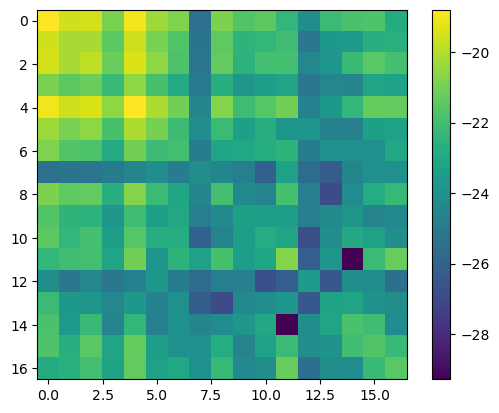

In [52]:
pl.figure()
pl.imshow(np.log(np.abs(cov_mat_kp3sims_pca)))
pl.colorbar()
pl.show()



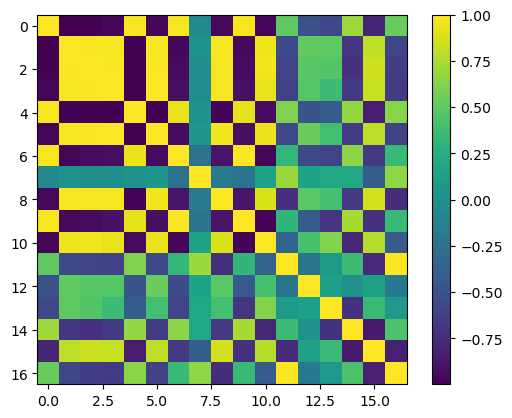

In [53]:
pl.figure()
pl.imshow((np.corrcoef((cov_mat_kp3sims_pca))))
pl.colorbar()
pl.show()



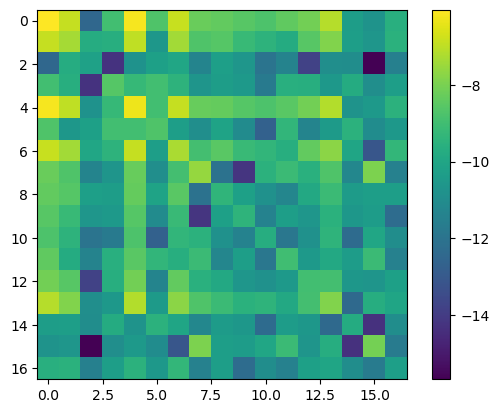

In [54]:
pl.figure()
pl.imshow(np.log(np.abs(cov_mat_kp2sims_pca)))
pl.colorbar()
pl.show()



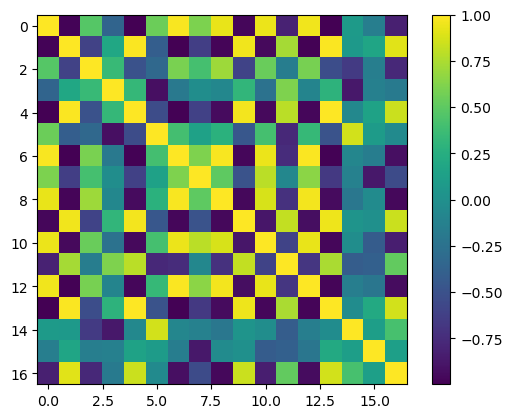

In [55]:
pl.figure()
pl.imshow(np.corrcoef((cov_mat_kp2sims_pca)))
pl.colorbar()
pl.show()



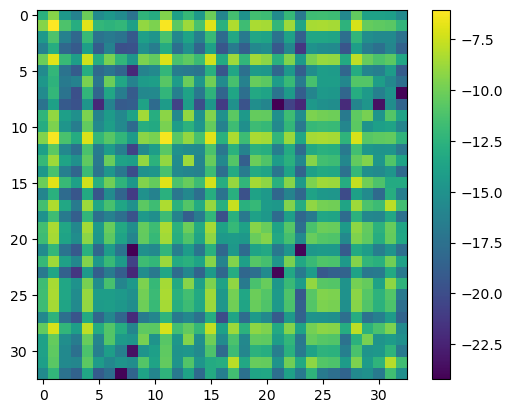

In [56]:
pl.figure()
pl.imshow(np.log(np.abs(cov_mat_kp2kp3sims_pca)))
pl.colorbar()
pl.show()



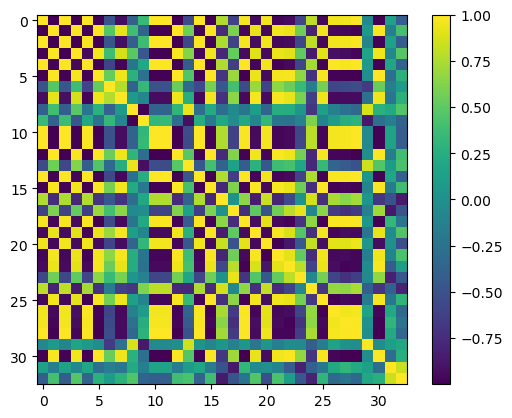

In [57]:
pl.figure()
pl.imshow(np.corrcoef((cov_mat_kp2kp3sims_pca)))
pl.colorbar()
pl.show()



In [ ]:
# '/global/cfs/cdirs/des/shivamp/cosmosis2p0/cosmosis-standard-library/output/GM_chains/test_kp2kp3_autosm_gtsc.txt'



In [137]:
import matplotlib
from getdist import plots, MCSamples
import numpy as np
import matplotlib.pyplot as pl
import matplotlib
import pdb
import scipy.optimize as op
import scipy.special as spsp
from getdist.paramnames import escapeLatex, makeList, mergeRenames
import matplotlib
matplotlib.rcParams['text.usetex'] = True
# matplotlib.rcParams['text.latex.unicode'] = True
import getdist



In [141]:
def get_nsample(filename):
    with open(filename,"r") as fi:
        for ln in fi:
            if ln.startswith("#nsample="):
                nsamples = int(ln[9:])
    return nsamples

def get_evidence(filename):
    with open(filename,"r") as fi:
        for ln in fi:
            if ln.startswith("#log_z="):
                logz = float(ln[7:])
    return logz


def get_param_names(filename):
    with open(filename,"r") as fi:
        param_names = np.array((fi.readline()[1:].split()))
    return param_names


def get_S8(data, names, Omega_m_name = 'cosmological_parameters--omega_m', sigma_8_name = 'COSMOLOGICAL_PARAMETERS--SIGMA_8', alpha=0.5):
    output_names = []
    ind_data = []
    for ii in range(len(names)):
        if (names[ii] in [Omega_m_name]):
            Omega_m_ind = ii
        if (names[ii] in [sigma_8_name]):
            sig8_ind = ii
    sigma_8 = data[:,sig8_ind]
    omega_m = data[:,Omega_m_ind]
    s8 = sigma_8 * (omega_m/0.3)**alpha
    return s8

def get_Obh2(data, names, Omega_b_name = 'cosmological_parameters--omega_b', h_name = 'cosmological_parameters--h0'):
    output_names = []
    ind_data = []
    for ii in range(len(names)):
        if (names[ii] in [Omega_b_name]):
            Omega_b_ind = ii
        if (names[ii] in [h_name]):
            h_ind = ii
    h0 = data[:,h_ind]
    omega_b = data[:,Omega_b_ind]
    return omega_b * (h0**2)

def get_Omh3(data, names, Omega_m_name = 'cosmological_parameters--omega_m', h_name = 'cosmological_parameters--h0'):
    output_names = []
    ind_data = []
    for ii in range(len(names)):
        if (names[ii] in [Omega_m_name]):
            Omega_m_ind = ii
        if (names[ii] in [h_name]):
            h_ind = ii
    h0 = data[:,h_ind]
    omega_m = data[:,Omega_m_ind]
    return omega_m * (h0**3)


def extract_bi(data, names, b1_name = 'bias_lens--b1e_sig8_bin', b2_name = 'bias_lens--b2e_sig8sq_bin', b1_name_out = 'bias_lens--b1e_bin', b2_name_out = 'bias_lens--b2e_bin', sigma_8_name = 'COSMOLOGICAL_PARAMETERS--SIGMA_8',bins_fit = [1,2,3,4,5]):
    b1_all = {}
    b2_all = {}
    for ii in range(len(names)):
        if (names[ii] in [sigma_8_name]):
            sig8_ind = ii
    sigma_8 = data[:,sig8_ind]
    
    for bini in bins_fit:
        for ii in range(len(names)):
            if (names[ii] == b1_name + str(bini)):
                b1_i = data[:,ii]/sigma_8
                b1_all[b1_name_out + str(bini)] = b1_i
            
            if (names[ii] == b2_name + str(bini)):
                b2_i = data[:,ii]/(sigma_8**2)
                b2_all[b2_name_out + str(bini)] = b2_i
    
    return b1_all, b2_all


def get_max_2dpost(g, root, param1='cosmological_parameters--omega_m', param2='cosmological_parameters--s8',param_pair = None):
    param_pair = g.get_param_array(root, param_pair or [param1, param2])
    
    density = g.sample_analyser.get_density_grid(root, param_pair[0], param_pair[1],
                                                                conts=g.settings.num_plot_contours,
                                                                likes=g.settings.shade_meanlikes)
    xyind = np.where(density.P == np.amax(density.P))
    return density.y[xyind[0][0]],density.x[xyind[1][0]]
    
def get_contour_line(sigma_contour,g, density):

    contours = spsp.erf(sigma_contour/np.sqrt(2))
    density.contours = density.getContourLevels([contours])
    contour_levels = density.contours
    fig1, ax1 = pl.subplots(1)
    cs = pl.contour(density.x, density.y, density.P, sorted(contour_levels))
    lines = []
    for line in cs.collections[0].get_paths():
        lines.append(line.vertices)
    pl.close()
    return lines

def get_dmin(line, xref, yref):
    linex = line[0][:,0]
    liney = line[0][:,1]
    d_all = np.sqrt((linex - xref)**2 + (liney - yref)**2)
    dmin = np.amin(d_all)
    return dmin

def lefthand(sigma_contour, g, density, xref, yref): 
    line = get_contour_line(sigma_contour,g, density)
    result = get_dmin(line, xref, yref)  
    return result

lefthand = np.vectorize(lefthand)
   
def diff(sigma_contour, g, density, xref, yref):
    result = lefthand(sigma_contour, g, density, xref, yref)
    return result

def root_find(init_x,g, density, xref, yref): 
    nll = lambda *args: diff(*args)
    args = (g, density, xref, yref)
    result = op.root(nll,np.array([init_x]),args=args,options={'maxfev':50})
    return result

def min_find(init_x,g, density, xref, yref): 
    nll = lambda *args: diff(*args)
    args = (g, density, xref, yref)
    result = op.fmin(nll,np.array([init_x]),args=args)
    return result
 
def unit_vector(vector):
    return vector / np.linalg.norm(vector)

def angle_between(v1, v2):
    v1_u = unit_vector(v1)
    v2_u = unit_vector(v2)
    return np.arccos(np.clip(np.dot(v1_u, v2_u), -1.0, 1.0))   

def get_frac_angle(start_coord, end_coord,xlims, ylims):
    xmean12 = (0.5*(start_coord[0] + end_coord[0]))
    ymean12 = (0.5*(start_coord[1] + end_coord[1]))
    dx = xlims[1] - xlims[0]
    dy = ylims[1] - ylims[0]
    dxp = xmean12 - end_coord[0]
    dyp = ymean12 - end_coord[1]
    angle_deg = 180.+ np.arctan2((end_coord[1]-start_coord[1])/dy,( end_coord[0]-start_coord[0])/dx)*(180./np.pi)
    return xmean12-dxp/2, ymean12+dyp/3, angle_deg

def replace_fancy(names, fancy_dic):
    output_names = []
    ind_data = []
    for ii in range(len(names)):
        if (names[ii] in fancy_dic):
            output_names.append(fancy_dic[names[ii]])
            ind_data.append(ii)
    return np.array(output_names), np.array(ind_data)



Removed no burn in
cosmological_parameters--omega_m: 0.3079580375138193, 0.10004045052484473, 0.04863893899218569
cosmological_parameters--s8: 0.7670902244269429, 0.18892999599292049, 0.226837998536359
Removed no burn in
cosmological_parameters--omega_m: 0.297456103128254, 0.0859953349502646, 0.04211776561136804
cosmological_parameters--s8: 0.7205317817643442, 0.1648963458224021, 0.1870468346898616


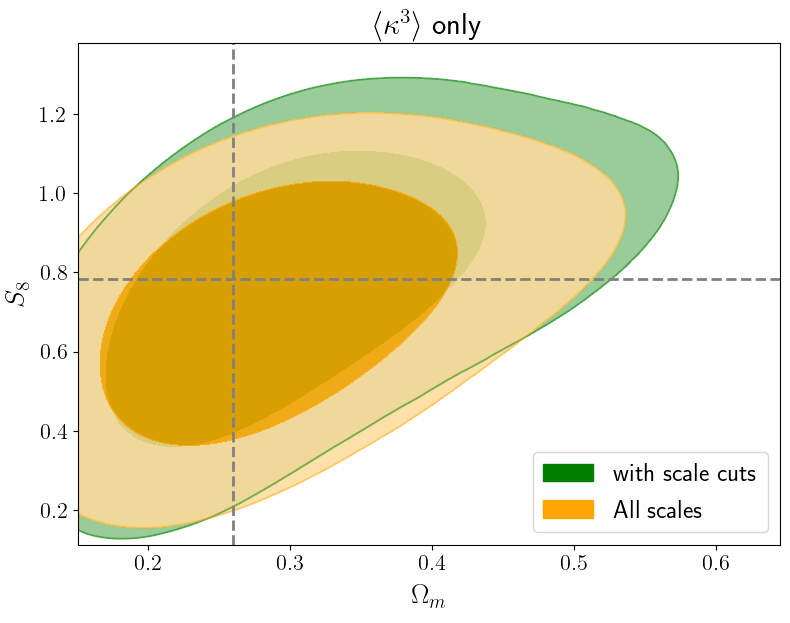

In [144]:
def replace_fancy(names, fancy_dic):
    output_names = []
    ind_data = []
    for ii in range(len(names)):
        if (names[ii] in fancy_dic):
            output_names.append(fancy_dic[names[ii]])
            ind_data.append(ii)
#         else:
#             output_names.append()
    return np.array(output_names), np.array(ind_data)


filename_list = [
    #     '/global/cfs/cdirs/des/shivamp/cosmosis2p0/cosmosis-standard-library/output/GM_chains/test_kp2_autosm_gtsc.txt',
    # '/global/cfs/cdirs/des/shivamp/cosmosis2p0/cosmosis-standard-library/output/GM_chains/test_kp2kp3_autosm_gtsc.txt',    

        # '/global/cfs/cdirs/des/shivamp/cosmosis2p0/cosmosis-standard-library/output/GM_chains/kp2_autosm_gtsc.txt',
    
    # '/global/cfs/cdirs/des/shivamp/cosmosis2p0/cosmosis-standard-library/output/GM_chains/kp2kp3_autosm_gtsc.txt',    
    # '/global/cfs/cdirs/des/shivamp/cosmosis2p0/cosmosis-standard-library/output/GM_chains/kp2kp3_all_gtsc.txt',  
    
    # '/global/cfs/cdirs/des/shivamp/cosmosis2p0/cosmosis-standard-library/output/GM_chains/kp2_autosm_gtsc.txt',    
    # '/global/cfs/cdirs/des/shivamp/cosmosis2p0/cosmosis-standard-library/output/GM_chains/kp2_all_gtsc.txt',        

    # '/global/cfs/cdirs/des/shivamp/cosmosis2p0/cosmosis-standard-library/output/GM_chains/kp3_autosm_gtsc.txt',    
    '/global/cfs/cdirs/des/shivamp/cosmosis2p0/cosmosis-standard-library/output/GM_chains/kp3_all_gtsc.txt',        
    
    # '/global/cfs/cdirs/des/shivamp/cosmosis2p0/cosmosis-standard-library/output/GM_chains/kp3_autosm_all.txt',            
    '/global/cfs/cdirs/des/shivamp/cosmosis2p0/cosmosis-standard-library/output/GM_chains/kp3_all.txt',        
    
    
    # '/global/cfs/cdirs/des/shivamp/boss_cosmosis/cosmosis/y3-3x2pt/chains/chain_2x2_0321.txt',
    # '/global/cfs/cdirs/des/shivamp/boss_cosmosis/cosmosis/y3-3x2pt/chains/chain_2x2pt_NLbias86_lcdm.txt',
    # '/global/cfs/cdirs/des/shivamp/boss_cosmosis/cosmosis/y3-3x2pt/chains/chain_2x2pt_NLbias44_lcdm.txt',
]

# legend_labels = [r'Linear Bias, (8,6)Mpc/$h$',r'Non-Linear Bias, (8,6)Mpc/$h$',r'Non-Linear Bias, (4,4)Mpc/$h$','DES Y1, 2x2pt', 'Planck 2018']
# legend_labels = [r'Auto $\theta$ bins', 'Generalized moments',r'Linear Bias, (8,6)Mpc/$h$',r'Non-Linear Bias, (8,6)Mpc/$h$',r'Non-Linear Bias, (4,4)Mpc/$h$']
legend_labels = ['with scale cuts','All scales',r'Linear Bias, (8,6)Mpc/$h$',r'Non-Linear Bias, (8,6)Mpc/$h$',r'Non-Linear Bias, (4,4)Mpc/$h$']

ext_b1b2 = [0,0,0,0]

all_data = []
all_samples = []

# fancy_dictionary = {'cosmological_parameters--omega_m':r'$\Omega_m$','cosmological_parameters--omega_mcb':r'$\Omega_m - \Omega_{\nu}$','cosmological_parameters--s8':r'$S_8$','cosmological_parameters--omnuh2':r'$\Omega_{\nu} h^2$'}  
# fancy_dictionary = {'cosmological_parameters--omega_m':r'$\Omega_m$','cosmological_parameters--omega_mcb':r'$\Omega_m - \Omega_{\nu}$','cosmological_parameters--s8':r'$S_8$','cosmological_parameters--omnuh2':r'$\Omega_{\nu} h^2$'}  
fancy_dictionary = {'cosmological_parameters--omega_m':r'$\Omega_m$','cosmological_parameters--s8':r'$S_8$'} 
# fancy_dictionary = {'cosmological_parameters--omega_m':r'$\Omega_m$','cosmological_parameters--mnu':r'$m_{\nu}$'} 

for fi in range(0,len(filename_list)):
    filename = filename_list[fi]
    try:
        nsample = get_nsample(filename)
    except:
        nsample = np.loadtxt(filename).shape[0]
    data = np.loadtxt(filename)[-nsample:,:]
    weights = np.loadtxt(filename)[-nsample:,-1]
    param_names = get_param_names(filename)
    
    s8 = get_S8(data, param_names).reshape(data.shape[0],1)
    data = np.hstack((data,s8))
    param_names = np.append(param_names,'cosmological_parameters--s8')
        
    param_names_fancy, selection = replace_fancy(np.array(param_names), fancy_dictionary)
    
    data = data[:,selection]
    param_names = param_names[selection]
    param_names_fancy = param_names_fancy
    all_data.append(data)

    samples = MCSamples(samples=data,\
                        weights=weights, \
                        names = param_names, labels = param_names_fancy)
    all_samples.append(samples)
    marge = samples.getMargeStats()
    for j1 in range(len(param_names)):
        paramj1 = param_names[j1]
        r_marge = marge.parWithName(paramj1)
        r_mean = r_marge.mean
        print(paramj1 + ': ' + str(r_mean) + ', ' + str(r_mean - r_marge.limits[0].lower) + ', ' + str(r_marge.limits[0].upper -  r_mean))
#         Om_err[keyv] = np.array([r_marge.limits[0].lower,r_marge.limits[0].upper])
#         print('Bin ' + str(j1+1) + ': ' + str(r_marge.limits[0].lower) + ', ' + str(r_marge.mean) + ', ' + str(r_marge.limits[0].upper))
    

#     print("nsamp  = ", nsample)
#     print("data shape = ", data.shape)
#     print( "weights shape = ", weights.shape)
#     print( "param names = ", param_names)
#     print( "param names fancy = ", param_names_fancy)


fig_save_dir = './paper_figs/'
# pl.rc('text.latex')

# param_limits = {'$\sigma8$':[0.7, 0.9]}

g = plots.getSinglePlotter(width_inch =8)
# g.settings.auto_ticks = True
g.settings.axes_fontsize   = 16
g.settings.lab_fontsize    = 20
g.settings.legend_fontsize = 20
g.settings.axis_marker_lw = 2.0
s8v = 0.8235 * (0.3/0.3)**0.5


h0 = 0.69
Onu = 0.00083/(0.69**2)
Om_cb = 0.3 - Onu

# marker_dict = {'cosmological_parameters--omega_m':0.3,'cosmological_parameters--omega_mcb':Om_cb,'COSMOLOGICAL_PARAMETERS--SIGMA_8':0.8235,'cosmological_parameters--s8':s8v,'cosmological_parameters--omega_b':0.048,'cosmological_parameters--h0':0.69,'cosmological_parameters--n_s':0.97,'cosmological_parameters--w':-1.0, 'cosmological_parameters--omnuh2':0.00083 ,'pk_to_cl--b1e_bin1':1.7,'pk_to_cl--b1e_bin2':1.7,'pk_to_cl--b1e_bin3':1.7,'pk_to_cl--b1e_bin4':2.0,'pk_to_cl--b1e_bin5':2.0,'pk_to_cl--b2e_bin1':0.23,'pk_to_cl--b2e_bin2':0.23,'pk_to_cl--b2e_bin3':0.23,'pk_to_cl--b2e_bin4':0.5,'pk_to_cl--b2e_bin5':0.5}    
# g.plot_2d(all_samples,'cosmological_parameters--omega_m','cosmological_parameters--s8', legend_labels = legend_labels, line_args=[{'lw':2.5,'color':'black'},{'lw':2.5,'color':'blue'},{'lw':2.5,'color':'red'},{'lw':2.5,'color':'green'}],contour_lws=[1.5],  filled = [False, False,True, False], contour_colors = ['black','blue','red','green'],ls=['-','--','-.'],lims=[0.2,0.52,0.55,0.85])  
# g.plot_2d(all_samples,'cosmological_parameters--omega_m','cosmological_parameters--s8', legend_labels = legend_labels, line_args=[{'lw':2.5,'color':'black'},{'lw':2.5,'color':'blue'},{'lw':2.5,'color':'red'},{'lw':2.5,'color':'green'},{'lw':2.5,'color':'orange'}],contour_lws=[1.5],  filled = [False, False,True, True, True], contour_colors = ['black','blue','red','green','orange'],ls=['-','--','-.','-','-'],lims=[0.2,0.7,0.57,0.88])  
g.plot_2d(all_samples,'cosmological_parameters--omega_m','cosmological_parameters--s8', legend_labels = legend_labels, line_args=[{'lw':2.5,'color':'green'},{'lw':2.5,'color':'orange'},{'lw':2.5,'color':'black'},{'lw':2.5,'color':'blue'},{'lw':2.5,'color':'red'}],contour_lws=[1.5],  filled = [True, True,False, False,True], contour_colors = ['green','orange','black','blue','red'],ls=['-','-','-','--','-.'])  
# g.triangle_plot(all_samples, legend_labels = legend_labels, markers=marker_dict,  filled = [True,  True,True])  
g.add_x_marker(0.26)
g.add_y_marker(0.84*(0.26/0.3)**(0.5))
g.add_legend(legend_labels, legend_loc='lower right',fontsize=18)
# pl.title(r'$\langle \kappa^2 \rangle + \langle \kappa^3 \rangle$', size=22)
pl.title(r'$\langle \kappa^3 \rangle$ only', size=22)
pl.show()




Removed no burn in
cosmological_parameters--omega_m: 0.27093803751312967, 0.040444037732903226, 0.030037701297540742
cosmological_parameters--s8: 0.7954960012529269, 0.019888184048834412, 0.019999580682502627
Removed no burn in
cosmological_parameters--omega_m: 0.26755842665112306, 0.044297288833536674, 0.027838766971415074
cosmological_parameters--s8: 0.7998380477202354, 0.02475060686354813, 0.02394765853161407
Removed no burn in
cosmological_parameters--omega_m: 0.310495614637556, 0.10306432129477089, 0.045295824640077254
cosmological_parameters--s8: 0.7462675621238599, 0.22384261977090603, 0.21591206758170978


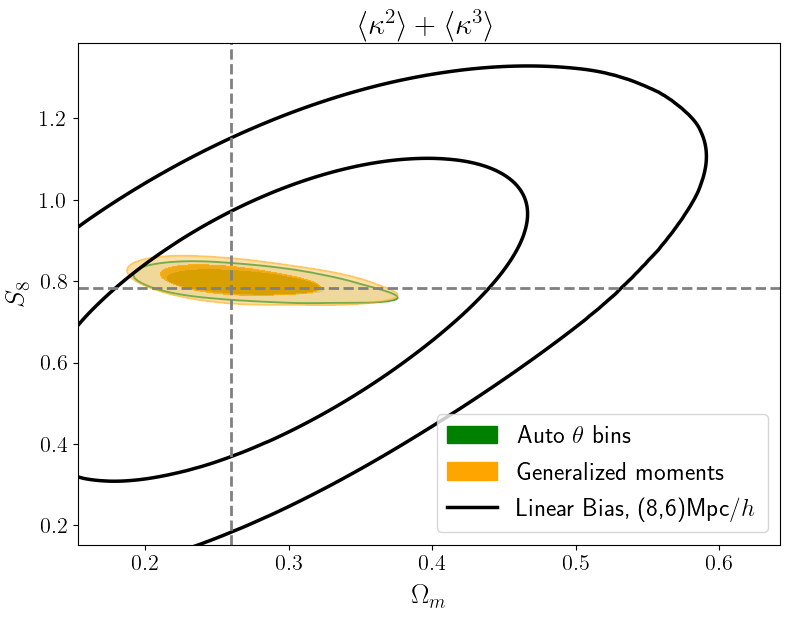

In [111]:
def replace_fancy(names, fancy_dic):
    output_names = []
    ind_data = []
    for ii in range(len(names)):
        if (names[ii] in fancy_dic):
            output_names.append(fancy_dic[names[ii]])
            ind_data.append(ii)
#         else:
#             output_names.append()
    return np.array(output_names), np.array(ind_data)


filename_list = [
    #     '/global/cfs/cdirs/des/shivamp/cosmosis2p0/cosmosis-standard-library/output/GM_chains/test_kp2_autosm_gtsc.txt',
    # '/global/cfs/cdirs/des/shivamp/cosmosis2p0/cosmosis-standard-library/output/GM_chains/test_kp2kp3_autosm_gtsc.txt',    

        # '/global/cfs/cdirs/des/shivamp/cosmosis2p0/cosmosis-standard-library/output/GM_chains/kp2_autosm_gtsc.txt',
    
    '/global/cfs/cdirs/des/shivamp/cosmosis2p0/cosmosis-standard-library/output/GM_chains/kp2kp3_autosm_gtsc.txt',    
    # '/global/cfs/cdirs/des/shivamp/cosmosis2p0/cosmosis-standard-library/output/GM_chains/kp2kp3_all_gtsc.txt',  
    
    '/global/cfs/cdirs/des/shivamp/cosmosis2p0/cosmosis-standard-library/output/GM_chains/kp2_autosm_gtsc.txt',    
    # '/global/cfs/cdirs/des/shivamp/cosmosis2p0/cosmosis-standard-library/output/GM_chains/kp2_all_gtsc.txt',        

    '/global/cfs/cdirs/des/shivamp/cosmosis2p0/cosmosis-standard-library/output/GM_chains/kp3_autosm_gtsc.txt',    
    # '/global/cfs/cdirs/des/shivamp/cosmosis2p0/cosmosis-standard-library/output/GM_chains/kp3_all_gtsc.txt',        

    
    
    # '/global/cfs/cdirs/des/shivamp/boss_cosmosis/cosmosis/y3-3x2pt/chains/chain_2x2_0321.txt',
    # '/global/cfs/cdirs/des/shivamp/boss_cosmosis/cosmosis/y3-3x2pt/chains/chain_2x2pt_NLbias86_lcdm.txt',
    # '/global/cfs/cdirs/des/shivamp/boss_cosmosis/cosmosis/y3-3x2pt/chains/chain_2x2pt_NLbias44_lcdm.txt',
]

# legend_labels = [r'Linear Bias, (8,6)Mpc/$h$',r'Non-Linear Bias, (8,6)Mpc/$h$',r'Non-Linear Bias, (4,4)Mpc/$h$','DES Y1, 2x2pt', 'Planck 2018']
legend_labels = [r'Auto $\theta$ bins', 'Generalized moments',r'Linear Bias, (8,6)Mpc/$h$',r'Non-Linear Bias, (8,6)Mpc/$h$',r'Non-Linear Bias, (4,4)Mpc/$h$']

ext_b1b2 = [0,0,0,0]

all_data = []
all_samples = []

# fancy_dictionary = {'cosmological_parameters--omega_m':r'$\Omega_m$','cosmological_parameters--omega_mcb':r'$\Omega_m - \Omega_{\nu}$','cosmological_parameters--s8':r'$S_8$','cosmological_parameters--omnuh2':r'$\Omega_{\nu} h^2$'}  
# fancy_dictionary = {'cosmological_parameters--omega_m':r'$\Omega_m$','cosmological_parameters--omega_mcb':r'$\Omega_m - \Omega_{\nu}$','cosmological_parameters--s8':r'$S_8$','cosmological_parameters--omnuh2':r'$\Omega_{\nu} h^2$'}  
fancy_dictionary = {'cosmological_parameters--omega_m':r'$\Omega_m$','cosmological_parameters--s8':r'$S_8$'} 
# fancy_dictionary = {'cosmological_parameters--omega_m':r'$\Omega_m$','cosmological_parameters--mnu':r'$m_{\nu}$'} 

for fi in range(0,len(filename_list)):
    filename = filename_list[fi]
    try:
        nsample = get_nsample(filename)
    except:
        nsample = np.loadtxt(filename).shape[0]
    data = np.loadtxt(filename)[-nsample:,:]
    weights = np.loadtxt(filename)[-nsample:,-1]
    param_names = get_param_names(filename)
    
    s8 = get_S8(data, param_names).reshape(data.shape[0],1)
    data = np.hstack((data,s8))
    param_names = np.append(param_names,'cosmological_parameters--s8')
        
    param_names_fancy, selection = replace_fancy(np.array(param_names), fancy_dictionary)
    
    data = data[:,selection]
    param_names = param_names[selection]
    param_names_fancy = param_names_fancy
    all_data.append(data)

    samples = MCSamples(samples=data,\
                        weights=weights, \
                        names = param_names, labels = param_names_fancy)
    all_samples.append(samples)
    marge = samples.getMargeStats()
    for j1 in range(len(param_names)):
        paramj1 = param_names[j1]
        r_marge = marge.parWithName(paramj1)
        r_mean = r_marge.mean
        print(paramj1 + ': ' + str(r_mean) + ', ' + str(r_mean - r_marge.limits[0].lower) + ', ' + str(r_marge.limits[0].upper -  r_mean))
#         Om_err[keyv] = np.array([r_marge.limits[0].lower,r_marge.limits[0].upper])
#         print('Bin ' + str(j1+1) + ': ' + str(r_marge.limits[0].lower) + ', ' + str(r_marge.mean) + ', ' + str(r_marge.limits[0].upper))
    

#     print("nsamp  = ", nsample)
#     print("data shape = ", data.shape)
#     print( "weights shape = ", weights.shape)
#     print( "param names = ", param_names)
#     print( "param names fancy = ", param_names_fancy)


fig_save_dir = './paper_figs/'
# pl.rc('text.latex')

# param_limits = {'$\sigma8$':[0.7, 0.9]}

g = plots.getSinglePlotter(width_inch =8)
# g.settings.auto_ticks = True
g.settings.axes_fontsize   = 16
g.settings.lab_fontsize    = 20
g.settings.legend_fontsize = 20
g.settings.axis_marker_lw = 2.0
s8v = 0.8235 * (0.3/0.3)**0.5


h0 = 0.69
Onu = 0.00083/(0.69**2)
Om_cb = 0.3 - Onu

# marker_dict = {'cosmological_parameters--omega_m':0.3,'cosmological_parameters--omega_mcb':Om_cb,'COSMOLOGICAL_PARAMETERS--SIGMA_8':0.8235,'cosmological_parameters--s8':s8v,'cosmological_parameters--omega_b':0.048,'cosmological_parameters--h0':0.69,'cosmological_parameters--n_s':0.97,'cosmological_parameters--w':-1.0, 'cosmological_parameters--omnuh2':0.00083 ,'pk_to_cl--b1e_bin1':1.7,'pk_to_cl--b1e_bin2':1.7,'pk_to_cl--b1e_bin3':1.7,'pk_to_cl--b1e_bin4':2.0,'pk_to_cl--b1e_bin5':2.0,'pk_to_cl--b2e_bin1':0.23,'pk_to_cl--b2e_bin2':0.23,'pk_to_cl--b2e_bin3':0.23,'pk_to_cl--b2e_bin4':0.5,'pk_to_cl--b2e_bin5':0.5}    
# g.plot_2d(all_samples,'cosmological_parameters--omega_m','cosmological_parameters--s8', legend_labels = legend_labels, line_args=[{'lw':2.5,'color':'black'},{'lw':2.5,'color':'blue'},{'lw':2.5,'color':'red'},{'lw':2.5,'color':'green'}],contour_lws=[1.5],  filled = [False, False,True, False], contour_colors = ['black','blue','red','green'],ls=['-','--','-.'],lims=[0.2,0.52,0.55,0.85])  
# g.plot_2d(all_samples,'cosmological_parameters--omega_m','cosmological_parameters--s8', legend_labels = legend_labels, line_args=[{'lw':2.5,'color':'black'},{'lw':2.5,'color':'blue'},{'lw':2.5,'color':'red'},{'lw':2.5,'color':'green'},{'lw':2.5,'color':'orange'}],contour_lws=[1.5],  filled = [False, False,True, True, True], contour_colors = ['black','blue','red','green','orange'],ls=['-','--','-.','-','-'],lims=[0.2,0.7,0.57,0.88])  
g.plot_2d(all_samples,'cosmological_parameters--omega_m','cosmological_parameters--s8', legend_labels = legend_labels, line_args=[{'lw':2.5,'color':'green'},{'lw':2.5,'color':'orange'},{'lw':2.5,'color':'black'},{'lw':2.5,'color':'blue'},{'lw':2.5,'color':'red'}],contour_lws=[1.5],  filled = [True, True,False, False,True], contour_colors = ['green','orange','black','blue','red'],ls=['-','-','-','--','-.'])  
# g.triangle_plot(all_samples, legend_labels = legend_labels, markers=marker_dict,  filled = [True,  True,True])  
g.add_x_marker(0.26)
g.add_y_marker(0.84*(0.26/0.3)**(0.5))
g.add_legend(legend_labels, legend_loc='lower right',fontsize=18)
pl.title(r'$\langle \kappa^2 \rangle + \langle \kappa^3 \rangle$', size=22)
pl.show()




Removed no burn in
cosmological_parameters--omega_m: 0.27093803751312967, 0.040444037732903226, 0.030037701297540742
cosmological_parameters--mnu: 0.12813284532380606, 0.04094137681769164, 0.04016530860320869
Removed no burn in
cosmological_parameters--omega_m: 0.2622960788406891, 0.03975940271297124, 0.02634344986522491
cosmological_parameters--mnu: 0.12542198834078172, 0.04387505448256085, 0.04137886228902482


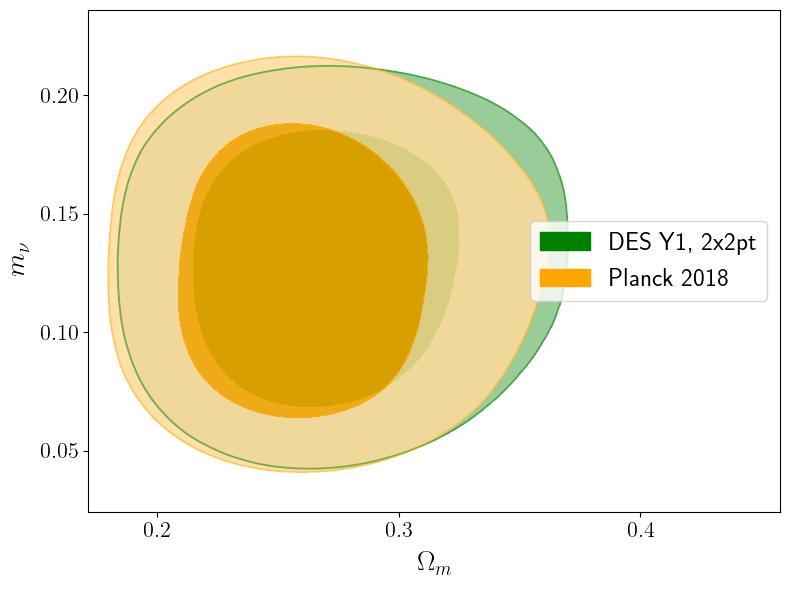

In [100]:
def replace_fancy(names, fancy_dic):
    output_names = []
    ind_data = []
    for ii in range(len(names)):
        if (names[ii] in fancy_dic):
            output_names.append(fancy_dic[names[ii]])
            ind_data.append(ii)
#         else:
#             output_names.append()
    return np.array(output_names), np.array(ind_data)


filename_list = [
        # '/global/cfs/cdirs/des/shivamp/cosmosis2p0/cosmosis-standard-library/output/GM_chains/test_kp2_autosm_gtsc.txt',
    # '/global/cfs/cdirs/des/shivamp/cosmosis2p0/cosmosis-standard-library/output/GM_chains/test_kp2kp3_autosm_gtsc.txt',    

        # '/global/cfs/cdirs/des/shivamp/cosmosis2p0/cosmosis-standard-library/output/GM_chains/kp2_autosm_gtsc.txt',
    '/global/cfs/cdirs/des/shivamp/cosmosis2p0/cosmosis-standard-library/output/GM_chains/kp2kp3_autosm_gtsc.txt',    
    '/global/cfs/cdirs/des/shivamp/cosmosis2p0/cosmosis-standard-library/output/GM_chains/kp2kp3_all_gtsc.txt',        
    
    # '/global/cfs/cdirs/des/shivamp/boss_cosmosis/cosmosis/y3-3x2pt/chains/chain_2x2_0321.txt',
    # '/global/cfs/cdirs/des/shivamp/boss_cosmosis/cosmosis/y3-3x2pt/chains/chain_2x2pt_NLbias86_lcdm.txt',
    # '/global/cfs/cdirs/des/shivamp/boss_cosmosis/cosmosis/y3-3x2pt/chains/chain_2x2pt_NLbias44_lcdm.txt',
]

# legend_labels = [r'Linear Bias, (8,6)Mpc/$h$',r'Non-Linear Bias, (8,6)Mpc/$h$',r'Non-Linear Bias, (4,4)Mpc/$h$','DES Y1, 2x2pt', 'Planck 2018']
legend_labels = ['DES Y1, 2x2pt', 'Planck 2018',r'Linear Bias, (8,6)Mpc/$h$',r'Non-Linear Bias, (8,6)Mpc/$h$',r'Non-Linear Bias, (4,4)Mpc/$h$']

ext_b1b2 = [0,0,0,0]

all_data = []
all_samples = []

# fancy_dictionary = {'cosmological_parameters--omega_m':r'$\Omega_m$','cosmological_parameters--omega_mcb':r'$\Omega_m - \Omega_{\nu}$','cosmological_parameters--s8':r'$S_8$','cosmological_parameters--omnuh2':r'$\Omega_{\nu} h^2$'}  
# fancy_dictionary = {'cosmological_parameters--omega_m':r'$\Omega_m$','cosmological_parameters--omega_mcb':r'$\Omega_m - \Omega_{\nu}$','cosmological_parameters--s8':r'$S_8$','cosmological_parameters--omnuh2':r'$\Omega_{\nu} h^2$'}  
# fancy_dictionary = {'cosmological_parameters--omega_m':r'$\Omega_m$','cosmological_parameters--s8':r'$S_8$'} 
fancy_dictionary = {'cosmological_parameters--omega_m':r'$\Omega_m$','cosmological_parameters--mnu':r'$m_{\nu}$'} 

for fi in range(0,len(filename_list)):
    filename = filename_list[fi]
    try:
        nsample = get_nsample(filename)
    except:
        nsample = np.loadtxt(filename).shape[0]
    data = np.loadtxt(filename)[-nsample:,:]
    weights = np.loadtxt(filename)[-nsample:,-1]
    param_names = get_param_names(filename)
    
    # s8 = get_S8(data, param_names).reshape(data.shape[0],1)
    # data = np.hstack((data,s8))
    # param_names = np.append(param_names,'cosmological_parameters--s8')
        
    param_names_fancy, selection = replace_fancy(np.array(param_names), fancy_dictionary)
    
    data = data[:,selection]
    param_names = param_names[selection]
    param_names_fancy = param_names_fancy
    all_data.append(data)

    samples = MCSamples(samples=data,\
                        weights=weights, \
                        names = param_names, labels = param_names_fancy)
    all_samples.append(samples)
    marge = samples.getMargeStats()
    for j1 in range(len(param_names)):
        paramj1 = param_names[j1]
        r_marge = marge.parWithName(paramj1)
        r_mean = r_marge.mean
        print(paramj1 + ': ' + str(r_mean) + ', ' + str(r_mean - r_marge.limits[0].lower) + ', ' + str(r_marge.limits[0].upper -  r_mean))
#         Om_err[keyv] = np.array([r_marge.limits[0].lower,r_marge.limits[0].upper])
#         print('Bin ' + str(j1+1) + ': ' + str(r_marge.limits[0].lower) + ', ' + str(r_marge.mean) + ', ' + str(r_marge.limits[0].upper))
    

#     print("nsamp  = ", nsample)
#     print("data shape = ", data.shape)
#     print( "weights shape = ", weights.shape)
#     print( "param names = ", param_names)
#     print( "param names fancy = ", param_names_fancy)


fig_save_dir = './paper_figs/'
# pl.rc('text.latex')

# param_limits = {'$\sigma8$':[0.7, 0.9]}

g = plots.getSinglePlotter(width_inch =8)
# g.settings.auto_ticks = True
g.settings.axes_fontsize   = 16
g.settings.lab_fontsize    = 20
g.settings.legend_fontsize = 20
g.settings.axis_marker_lw = 2.0
s8v = 0.8235 * (0.3/0.3)**0.5


h0 = 0.69
Onu = 0.00083/(0.69**2)
Om_cb = 0.3 - Onu

# marker_dict = {'cosmological_parameters--omega_m':0.3,'cosmological_parameters--omega_mcb':Om_cb,'COSMOLOGICAL_PARAMETERS--SIGMA_8':0.8235,'cosmological_parameters--s8':s8v,'cosmological_parameters--omega_b':0.048,'cosmological_parameters--h0':0.69,'cosmological_parameters--n_s':0.97,'cosmological_parameters--w':-1.0, 'cosmological_parameters--omnuh2':0.00083 ,'pk_to_cl--b1e_bin1':1.7,'pk_to_cl--b1e_bin2':1.7,'pk_to_cl--b1e_bin3':1.7,'pk_to_cl--b1e_bin4':2.0,'pk_to_cl--b1e_bin5':2.0,'pk_to_cl--b2e_bin1':0.23,'pk_to_cl--b2e_bin2':0.23,'pk_to_cl--b2e_bin3':0.23,'pk_to_cl--b2e_bin4':0.5,'pk_to_cl--b2e_bin5':0.5}    
# g.plot_2d(all_samples,'cosmological_parameters--omega_m','cosmological_parameters--s8', legend_labels = legend_labels, line_args=[{'lw':2.5,'color':'black'},{'lw':2.5,'color':'blue'},{'lw':2.5,'color':'red'},{'lw':2.5,'color':'green'}],contour_lws=[1.5],  filled = [False, False,True, False], contour_colors = ['black','blue','red','green'],ls=['-','--','-.'],lims=[0.2,0.52,0.55,0.85])  
# g.plot_2d(all_samples,'cosmological_parameters--omega_m','cosmological_parameters--s8', legend_labels = legend_labels, line_args=[{'lw':2.5,'color':'black'},{'lw':2.5,'color':'blue'},{'lw':2.5,'color':'red'},{'lw':2.5,'color':'green'},{'lw':2.5,'color':'orange'}],contour_lws=[1.5],  filled = [False, False,True, True, True], contour_colors = ['black','blue','red','green','orange'],ls=['-','--','-.','-','-'],lims=[0.2,0.7,0.57,0.88])  
g.plot_2d(all_samples,'cosmological_parameters--omega_m','cosmological_parameters--mnu', legend_labels = legend_labels, line_args=[{'lw':2.5,'color':'green'},{'lw':2.5,'color':'orange'},{'lw':2.5,'color':'black'},{'lw':2.5,'color':'blue'},{'lw':2.5,'color':'red'}],contour_lws=[1.5],  filled = [True, True,False, False,True], contour_colors = ['green','orange','black','blue','red'],ls=['-','-','-','--','-.'])  
# g.triangle_plot(all_samples, legend_labels = legend_labels, markers=marker_dict,  filled = [True,  True,True])  
# g.add_x_marker(0.3)
# g.add_y_marker(0.0)
g.add_legend(legend_labels, legend_loc='center right',fontsize=18)
pl.show()

